
    Nama : Dini Ramadhani Salsabila
    Umur = 21 tahun
    E-mail = diniramadhani553@gmail.com
    Asal kampus = Universitas Andalas
    Jurusan = Teknik Komputer

sumber dataset : https://www.kaggle.com/kishanyadav/inshort-news 

In [1]:
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dropout, Dense

sns.set()
%matplotlib inline

In [2]:
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
files = files.upload()

Saving inshort_news_data-1.csv to inshort_news_data-1.csv
Saving inshort_news_data-2.csv to inshort_news_data-2.csv
Saving inshort_news_data-3.csv to inshort_news_data-3.csv
Saving inshort_news_data-4.csv to inshort_news_data-4.csv
Saving inshort_news_data-5.csv to inshort_news_data-5.csv
Saving inshort_news_data-6.csv to inshort_news_data-6.csv
Saving inshort_news_data-7.csv to inshort_news_data-7.csv


In [3]:
berita1 = pd.read_csv(io.BytesIO(files['inshort_news_data-1.csv']))
berita2 = pd.read_csv(io.BytesIO(files['inshort_news_data-2.csv']))
berita3 = pd.read_csv(io.BytesIO(files['inshort_news_data-3.csv']))
berita4 = pd.read_csv(io.BytesIO(files['inshort_news_data-4.csv']))
berita5 = pd.read_csv(io.BytesIO(files['inshort_news_data-5.csv']))
berita6 = pd.read_csv(io.BytesIO(files['inshort_news_data-6.csv']))
berita7 = pd.read_csv(io.BytesIO(files['inshort_news_data-7.csv']))

In [4]:
data = [berita1, berita2, berita3, berita4, berita5, berita6, berita7]
df = pd.concat(data, axis=0, ignore_index=True)
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [5]:
df.shape

(12120, 4)

In [6]:
df = df.drop(['Unnamed: 0', 'news_headline'], axis=1)
df.head()

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology



Data Visualization

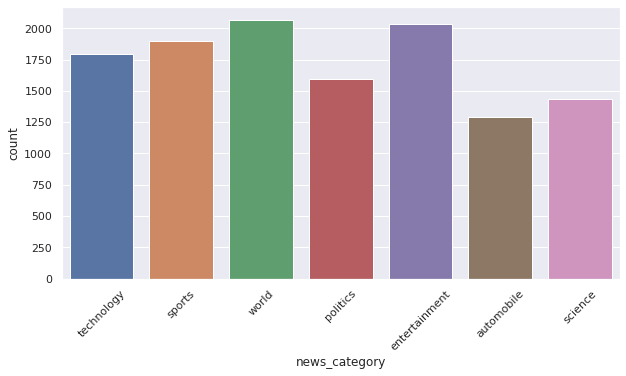

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['news_category'])
plt.xticks(rotation=45)
plt.show()

In [8]:
review = pd.get_dummies(df['news_category'])
df2 = pd.concat([df, review], axis=1)
df2 = df2.drop('news_category', axis=1)
df2.head()

,news_article,automobile,entertainment,politics,science,sports,technology,world
0,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0


Splitting, Tokenizing, dan Padding

In [9]:
X = df2['news_article'].values
y = df2.drop('news_article', axis=1).values
#split jadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tokenizer = Tokenizer(num_words=5000, oov_token='n')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

model

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()
model = Sequential([
                    Embedding(input_dim=10000, output_dim=128),
                    LSTM(128),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(padded_train, y_train, epochs=62, validation_data=(padded_test, y_test), callbacks=[callbacks], batch_size=184)

Epoch 1/62
53/53 [==============================] - 18s 295ms/step - loss: 1.6938 - accuracy: 0.2744 - val_loss: 1.2917 - val_accuracy: 0.3853
Epoch 2/62
53/53 [==============================] - 15s 276ms/step - loss: 1.0452 - accuracy: 0.5182 - val_loss: 0.7979 - val_accuracy: 0.6040
Epoch 3/62
53/53 [==============================] - 15s 281ms/step - loss: 0.6532 - accuracy: 0.6949 - val_loss: 0.5831 - val_accuracy: 0.7182
Epoch 4/62
53/53 [==============================] - 15s 281ms/step - loss: 0.4212 - accuracy: 0.8266 - val_loss: 0.3927 - val_accuracy: 0.8791
Epoch 5/62
53/53 [==============================] - 15s 286ms/step - loss: 0.2582 - accuracy: 0.9223 - val_loss: 0.3380 - val_accuracy: 0.8985
Epoch 6/62
53/53 [==============================] - 15s 280ms/step - loss: 0.1937 - accuracy: 0.9462 - val_loss: 0.3576 - val_accuracy: 0.9018

akurasi telah mencapai 90%


plot hasil model

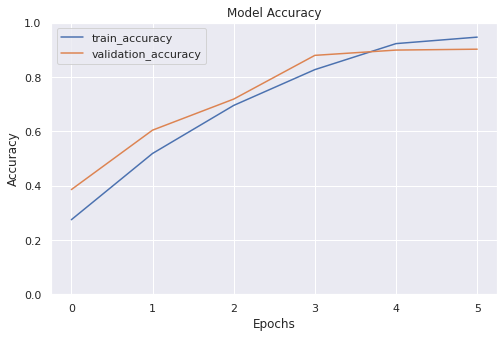

In [11]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

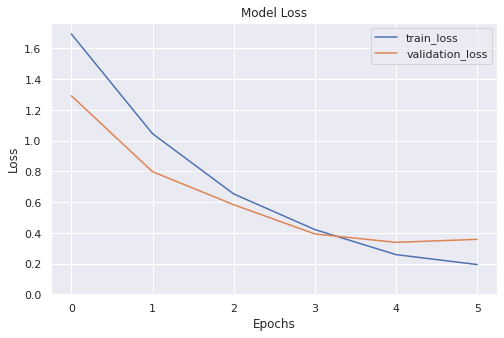

In [12]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()